# Importing the dependencies.

### Importing necessary libraries


Here, we are importing the dependencies that we will require initially in this data analysis task for analysing the loan data for Zappy.

In [ ]:
!pip install pdfplumber

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import numpy as np
import pandas as pd
import pdfplumber
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from openpyxl import load_workbook

# Data Preprocessing

### Extract Data from PDF to CSV and Pandas DataFrame

The fuction `extract_data_from_pdf` extracts data from pdf files and then saves the data into a csv file Moreover, this function loads the data into a pandas dataframe for further processing.

#### Function Overview:

1. **Input**:
   - `input_path`: The path for the  PDF file.

2. **Output**:
   - `loan_data_pdf`: The path for  Pandas DataFrame containing the extracted data.

3. **Process**:
   - The function opens the PDF using python library `pdfplumber`that has been previously loaded and iterates over each page of the pdf file.
   - The function extracts tables using method `extract_tables`on each page.
   - The fuction iterates over each table to extract rows and writes these data to a CSV file using the `csv.writer`.
   - After that, the function loads the CSV into a Pandas DataFrame using `pd.read_csv`.
   -The function returns the loaded DataFrame.

In [9]:
def extract_data_from_pdf(input_path):
    output_path = 'Content/PDA - Loans_Database_Table.csv'
    with pdfplumber.open(input_path) as pdf:
        with open(output_path, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            for page in pdf.pages:
                tables = page.extract_tables()
                for table in tables:
                    for row in table:
                        writer.writerow(row)
    loan_data_pdf = pd.read_csv(output_path)
    return loan_data_pdf

### Load Data from Excel into Pandas DataFrame

This function `load_data_from_excel` is for loading the data from an Excel file into a Pandas DataFrame.

### Function Overview:

1. **Input**:
   - `excel_file`: The path to the Excel file.

2. **Output**:
   - A Pandas DataFrame.

3. **Process**:
   - Using `pd.read_excel` function, this function reads the data from the Excel file.
   - Then, the function detects the appropriate data types and handles various Excel formats.
   - Lastly, the function returns a Pandas DataFrame.

In [14]:
def load_data_from_excel(excel_file):
    return pd.read_excel(excel_file,  engine='openpyxl')

## Main Function Overview

The `main` function is the entry point for the notebook. It loads the data from both PDF and Excel file. For this, it uses `extract_data_from_pdf` and `load_data_from_excel`.

### Function Execution:

1. **Loading Data from PDF**:
   - The `extract_data_from_pdf` function is called with the path to the PDF file ("/content/PDA - Loans_Database_Table.pdf").
   
2. **Loading Data from Excel**:
   - The `load_data_from_excel` function is called with the path to the Excel file ("/content/PDA - Zappy Loan Data.xlsx").

3. **Displaying DataFrame Columns**:
   - The columns of both the PDF and Excel DataFrames are printed to the console for inspection.

4. **Execution**:
   - The `main` function is executed when the notebook is run.


In [15]:
def main():
    # Load loan data from PDF
    pdf_data = extract_data_from_pdf("Content/PDA - Loans_Database_Table.pdf")

    # Load loan data from Excel
    excel_data = load_data_from_excel("Content/PDA - Zappy Loan Data.xlsx")

    # Display DataFrame columns
    print("PDF DataFrame columns:", pdf_data.columns)
    print("Excel DataFrame columns:", excel_data.columns)

    return pdf_data, excel_data

if __name__ == "__main__":
    pdf_df, excel_df = main()

PDF DataFrame columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Excel DataFrame columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


### Merging Two Datasets

Here, using the `pandas` library, we will concat the dataframes that have initially been loaded in the notebook using `pd.concat([], axis = 0)`.

Here, the concatination is done row-wise as the axis is set to `axis = 0`

In [16]:
df = pd.concat([pdf_df, excel_df], axis=0)

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 0 to 246
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            645 non-null    int64  
 1   Gender             645 non-null    int64  
 2   Married            645 non-null    int64  
 3   Dependents         645 non-null    int64  
 4   Graduate           645 non-null    int64  
 5   Self_Employed      645 non-null    int64  
 6   ApplicantIncome    645 non-null    int64  
 7   CoapplicantIncome  645 non-null    float64
 8   LoanAmount         645 non-null    int64  
 9   Loan_Amount_Term   645 non-null    int64  
 10  Credit_History     645 non-null    int64  
 11  Property_Area      645 non-null    int64  
 12  Loan_Status        645 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 70.5+ KB


### Identifying Duplicates

Here, we will first identify if there is any duplicate values in this new dataframe that we have obtained after concating two previously loaded datasets. To identify and visualize the duplicate values in the dataframe, we will use `pandas` function ``df.duplicated()`` and print the duplicate values first.

In [19]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated()]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
    Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
22     1925       2        0           0         1              1   
29     1945       2        0           0         1              0   
34     1955       2        0           0         1              0   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
22             2600             1717.0          99               300   
29             5417                0.0         143               480   
34             5000             2541.0         151               480   

    Credit_History  Property_Area Loan_Status  
22               1              2           N  
29               0              1           N  
34               1              3           N  


In [20]:
# Finding all occurrences of duplicates
all_duplicates = df[df.duplicated(keep=False)]


all_duplicates


,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
286,1925,2,0,0,1,1,2600,1717.0,99,300,1,2,N
293,1945,2,0,0,1,0,5417,0.0,143,480,0,1,N
298,1955,2,0,0,1,0,5000,2541.0,151,480,1,3,N
22,1925,2,0,0,1,1,2600,1717.0,99,300,1,2,N
29,1945,2,0,0,1,0,5417,0.0,143,480,0,1,N
34,1955,2,0,0,1,0,5000,2541.0,151,480,1,3,N


### Dropping Duplicates
This code removes duplicate entries from a DataFrame based on a specified subset of columns. In this case, the subset consists of the 'Loan_ID' column.

### Code Explanation
- `df`: Refers to the DataFrame from which duplicate entries are to be removed.
- `drop_duplicates()`: This method is used to remove duplicate rows from the DataFrame.
  - `subset=['Loan_ID']`: Specifies that duplicates should be identified based on the 'Loan_ID' column.
  - `keep='last'`: Specifies to keep the last occurrence of duplicated entries, meaning only the last duplicate entry will be retained, and earlier duplicates will be removed.


In [21]:
# Removing duplicate rows
df = df.drop_duplicates(subset=['Loan_ID'], keep='last')

df

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2978,2,0,0,1,0,2900,0.0,71,333,1,3,Y
243,2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
244,2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y
245,2984,1,1,2,1,0,7583,0.0,187,333,1,1,Y


### Setting `Loan_ID` as the index for the dataframe.

Here, using the `pandas` function, `df.set_index('Loan_ID', inplace=True)`, we will set the `Loan_ID` to be the index of the dataframe as it was asked in the assignment.

In [22]:
df.set_index('Loan_ID', inplace=True)

In [23]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Detecting the Outliers.

Here, we will use the Z-score method which is a statistical technique used to identify outliers in a dataset based on their deviation from the mean in terms of standard deviations. This method calculates the Z-score for each data point and identifies those with Z-scores exceeding a specified threshold, typically set to 2 or 3 standard deviations from the mean.

In [25]:
# Z-score method to identify outliers
def detect_outliers_zscore(df, threshold=3):
    from scipy.stats import zscore

    # Exclude non-numeric columns
    numeric_df = df.select_dtypes(include=['number'])

    # Calculate Z-score only for numeric columns
    z_scores = zscore(numeric_df)
    abs_z_scores = abs(z_scores)

    # Check for outliers
    outliers = (abs_z_scores > threshold).any(axis=1)
    return outliers

outliers_zscore = detect_outliers_zscore(df)

print("Outliers detected using Z-score method:")
print(df[outliers_zscore])

Outliers detected using Z-score method:
         Gender  Married  Dependents  Graduate  Self_Employed  \
Loan_ID                                                         
1020          1        1           1         1              0   
1030          1        1           2         1              0   
1238          1        1           3         0              1   
1325          1        0           0         0              0   
1448          1        1           3         1              0   
1469          1        0           0         1              1   
1482          1        1           0         1              1   
1536          1        1           3         1              0   
1585          1        1           3         1              0   
1610          1        1           3         1              0   
1637          1        1           1         1              0   
1640          1        1           0         1              1   
1806          1        0           0         1    

### Exploratory Data Analysis (EDA)

Here, we will do some EDA on the obtained dataframe that were asked on the assignment. Here, we will do EDA to find -

*  Total amount loaned by ZFS
*  Average loan amount
*  Average loan term
*  Total number of applicants broken down into Approved and Rejected
*  Number of males and females in each case
*  Maximum and minimum amounts loaned
*  Number of self-employed who had their loan approved, expressed as a percentage of all who had their loan approved
*  Income distribution of all main applicants, showing average and standard deviation
*  Top ten applicants by loan amount





In [26]:
# Total amount loaned by ZFS
total_loan_amount = df['LoanAmount'].sum()
print("\nTotal amount loaned by ZFS:", total_loan_amount)


Total amount loaned by ZFS: 91337


In [27]:
average_loan_amount = df['LoanAmount'].mean()
print("Average amount loaned:", average_loan_amount)

Average amount loaned: 148.75732899022802


In [28]:
average_loan_term = df['Loan_Amount_Term'].mean()
print("Average loan term:", average_loan_term)

Average loan term: 333.56677524429966


In [29]:
# Total number of applicants broken down into Approved and Rejected
applicants_approved = df[df['Loan_Status'] == 'Y'].shape[0]
applicants_rejected = df[df['Loan_Status'] == 'N'].shape[0]
print("\nTotal number of applicants:")
print("Approved:", applicants_approved)
print("Rejected:", applicants_rejected)


Total number of applicants:
Approved: 422
Rejected: 192


In [30]:
# Number of males and females in each case
applicants_gender_approved = df[df['Loan_Status'] == 'Y']['Gender'].value_counts()
applicants_gender_rejected = df[df['Loan_Status'] == 'N']['Gender'].value_counts()
print("\nNumber of males and females in each case:")
print("Approved:")
print(applicants_gender_approved)
print("Rejected:")
print(applicants_gender_rejected)


Number of males and females in each case:
Approved:
Gender
1    347
2     75
Name: count, dtype: int64
Rejected:
Gender
1    155
2     37
Name: count, dtype: int64


In [31]:
# Maximum and minimum amounts loaned
max_loan_amount = df['LoanAmount'].max()
min_loan_amount = df['LoanAmount'].min()
print("\nMaximum and minimum amounts loaned:")
print("Maximum:", max_loan_amount)
print("Minimum:", min_loan_amount)


Maximum and minimum amounts loaned:
Maximum: 700
Minimum: 9


In [32]:
# Number of self-employed who had their loan approved, expressed as a percentage of all who had their loan approved
self_employed_approved = df[(df['Loan_Status'] == 'Y') & (df['Self_Employed'] == 1)].shape[0]
total_approved = applicants_approved
percentage_self_employed_approved = (self_employed_approved / total_approved) * 100
print("\nPercentage of self-employed who had their loan approved:", percentage_self_employed_approved)


Percentage of self-employed who had their loan approved: 13.270142180094787


In [33]:
# Income distribution of all main applicants, showing average and standard deviation
income_distribution = df['ApplicantIncome']
average_income = income_distribution.mean()
std_dev_income = income_distribution.std()
print("\nIncome distribution of all main applicants:")
print("Average income:", average_income)
print("Standard deviation of income:", std_dev_income)


Income distribution of all main applicants:
Average income: 5403.459283387622
Standard deviation of income: 6109.041673387178


In [34]:
top_applicants = df.nlargest(10, 'LoanAmount')
print("\nTop ten applicants by loan amount:")
print(top_applicants[['LoanAmount']])


Top ten applicants by loan amount:
         LoanAmount
Loan_ID            
1585            700
1469            650
1536            600
2813            600
2191            570
2547            500
2959            496
1610            495
2101            490
1996            480


# Testing Data Analysis Automation Code with Excel Export

In this scenario, we are exporting a DataFrame (`df`) to an Excel file named `filename.xlsx`. This action is typically performed as part of testing data analysis automation code that involves generating reports, visualizations, or further analysis based on the data.

### Steps:
1. **Data Analysis Automation Code**: Develop Python code that automates data analysis tasks using libraries such as Pandas.
2. **DataFrame Generation**: Within the code, generate or load data into a Pandas DataFrame (`df`).
3. **Export to Excel**: Use the `to_excel()` function provided by Pandas to export the DataFrame to an Excel file.
   ```python \
   import pandas as pd```

In [35]:
df.to_excel('Content/test_file.xlsx', index=False)

In [36]:
df

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2,0,0,1,0,2900,0.0,71,333,1,3,Y
2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y


# Visualizing The Data

Here, we will use the python data visualization libraries to visualize the data and will try to understand what the data is telling us to do. Here, we will use `Matplotlib`, `Seaborn`, and `Plotly` to visualize different aspects of the dataset.   

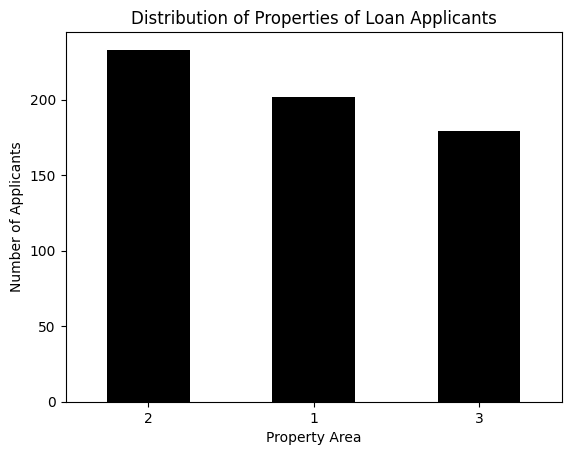

In [37]:
property_distribution = df['Property_Area'].value_counts()
property_distribution.plot(kind='bar', color='black')
plt.title('Distribution of Properties of Loan Applicants')
plt.xlabel('Property Area')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.show()

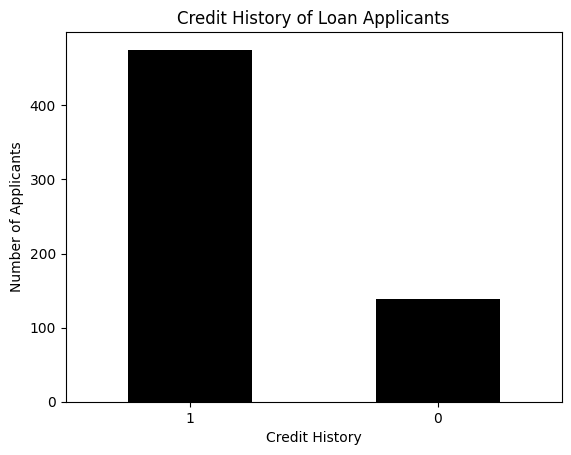

In [38]:
df['Credit_History'].value_counts().plot(kind='bar', color='black')
plt.title('Credit History of Loan Applicants')
plt.xlabel('Credit History')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=0)
plt.show()

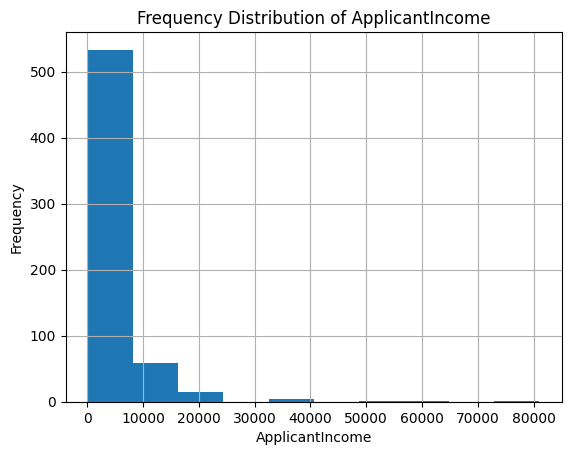

In [39]:
df['ApplicantIncome'].hist(bins=10)
plt.title('Frequency Distribution of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Frequency')
plt.show()

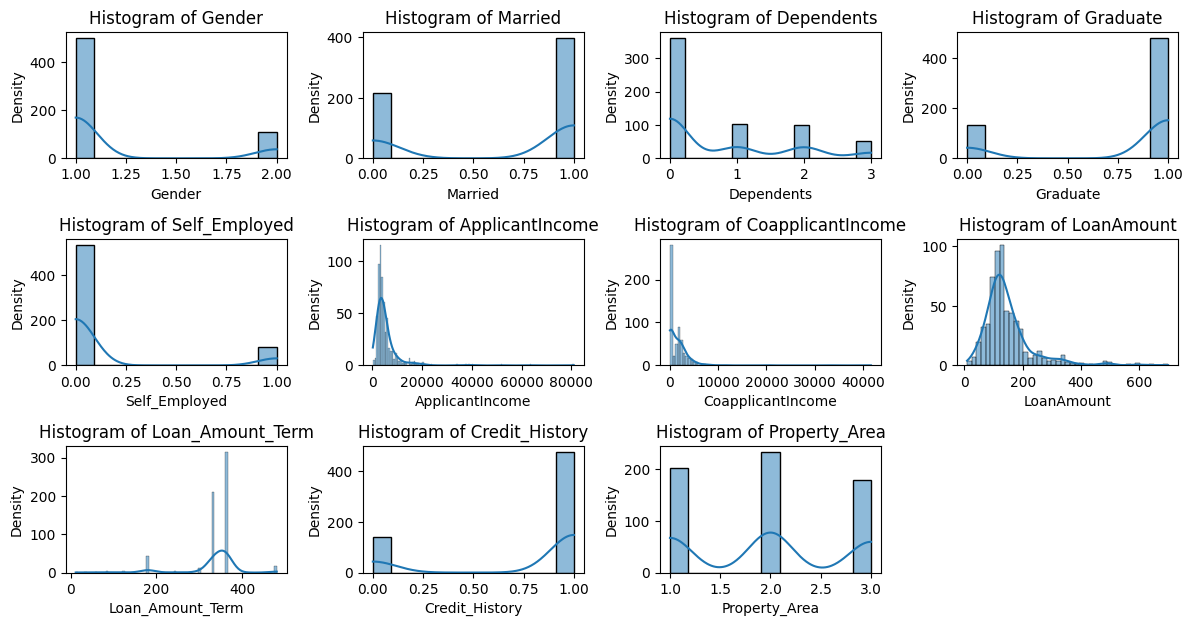

In [40]:
# Define numerical columns
numerical_cols = df.select_dtypes(exclude=['object', 'category', 'bool']).columns

# Create subplots for histograms using Seaborn
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [41]:
import plotly.express as px

# Create box plots for numerical columns using Plotly Express
fig = px.box(df[numerical_cols], title='Box Plot of Numerical Columns')
fig.update_layout(xaxis_title='Column', yaxis_title='Value', xaxis_tickangle=-45)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

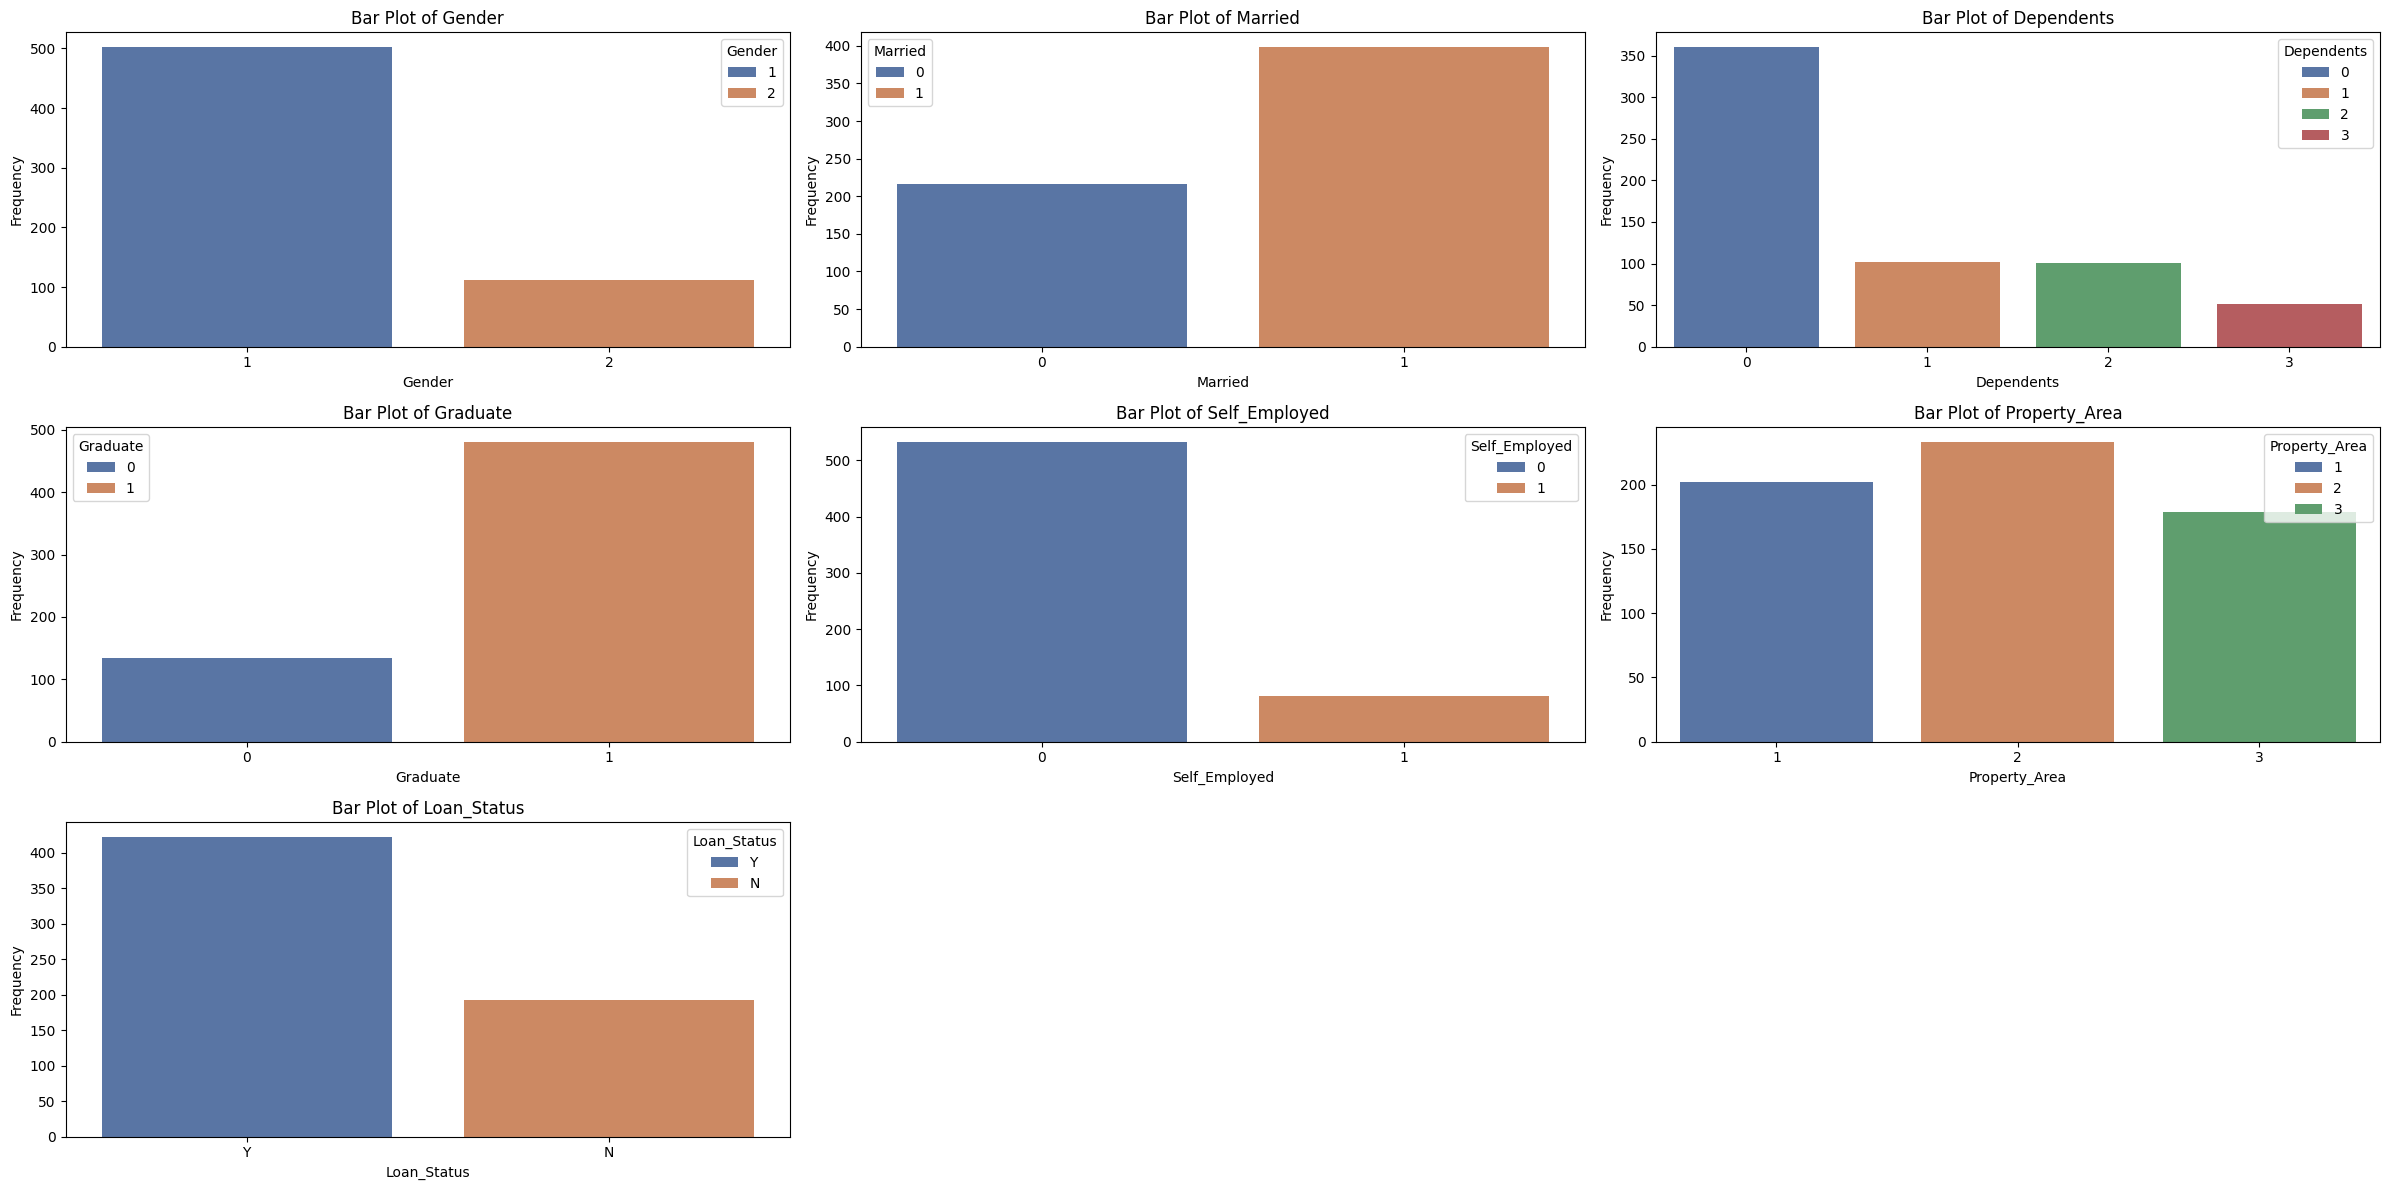

In [ ]:
plt.figure(figsize=(24, 12))

categorical_cols = ['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed', 'Property_Area', 'Loan_Status']
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, palette='deep', hue=col, legend=True)
    plt.title('Bar Plot of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objs as go

# Create a list to store the figures
figures = []

# Crosstabulation and Stacked Bar plot for Loan_Status vs. other categorical variables
for col in ['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed', 'Property_Area']:
    cross_tab = pd.crosstab(df[col], df['Loan_Status'])

    # Create traces for each category in the column
    traces = []
    for status in df['Loan_Status'].unique():
        trace = go.Bar(x=cross_tab.index, y=cross_tab[status], name=status)
        traces.append(trace)

    # Create layout for the figure
    layout = go.Layout(title='Loan Status by ' + col,
                       xaxis=dict(title=col),
                       yaxis=dict(title='Frequency'),
                       barmode='stack')

    # Create the figure
    figure = go.Figure(data=traces, layout=layout)
    figures.append(figure)

# Display the figures
for figure in figures:
    figure.show()


# Feature Engineering

Here, we will do some feature engineering to the obtained dataset by adding some columns and transforming some columns using the characteristics of the existing columns. For example, we can create a column named `Income_Category` using the distribution of `ApplicantIncome` column, obtain a new column named `TotalIncome` using `ApplicantIncome` and `CoapplicantIncome` columns.

### Mapping income ranges to categories.

Here, we will map the `ApplicantIncome` to different categories to obtain `Income_Category` of the dataframe.

In [ ]:
bins = [0, 2000, 4000, 7500, 12000, 100000]
labels = [1, 2, 3, 4, 5]

# Map income ranges to categories
df['Income_Category'] = pd.cut(df['ApplicantIncome'], bins=bins, labels=labels, right=False)


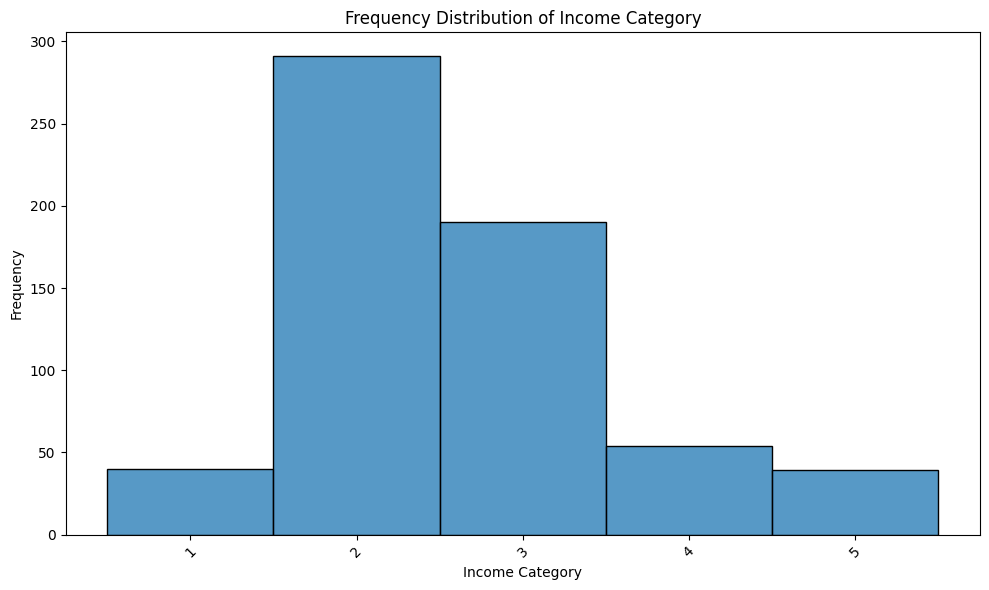

In [ ]:
plt.figure(figsize=(10, 6))

# Create a bar plot for the frequency distribution of 'Income_Category'
sns.histplot(data=df, x='Income_Category', discrete=True)
plt.title('Frequency Distribution of Income Category')
plt.xlabel('Income Category')
plt.ylabel('Frequency')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

### Creating a new column 'TotalIncome' by summing 'ApplicantIncome' and 'CoapplicantIncome'

Here, we will create a new column named `TotalIncome` by summing the 'ApplicantIncome' and 'CoapplicantIncome' columns to create a feature in this dataset.

In [ ]:
# Create a new column 'TotalIncome' by summing 'ApplicantIncome' and 'CoapplicantIncome'
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [ ]:
df.head()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Category,TotalIncome
Loan_ID,,,,,,,,,,,,,,
1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y,3,5849.0
1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N,3,6091.0
1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y,2,3000.0
1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y,2,4941.0
1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y,3,6000.0


In [ ]:
df['LoanAmount'].unique()

array([128,  66, 120, 141, 267,  95, 158, 168, 349,  70, 109, 200, 114,
        17, 125, 100,  76, 133, 115, 104, 315, 116, 112, 151, 191, 122,
       110,  35, 201,  74, 106, 320, 144, 184,  80,  47,  75, 134,  96,
        88,  44, 286,  97, 135, 180,  99, 165, 258, 126, 312, 136, 172,
        81, 187, 113, 176, 130, 111, 167, 265,  50, 210, 175, 131, 188,
        25, 137, 160, 225, 216,  94, 139, 152, 118, 185, 154,  85, 259,
       194,  93, 370, 182, 650, 102, 290,  84, 242, 129,  30, 244, 600,
       255,  98, 275, 121,  63, 700,  87, 101, 495,  67,  73, 260, 108,
        58,  48, 164, 170,  83,  90, 166, 124,  55,  59, 127, 214, 240,
        72,  60, 138,  42, 280, 140, 155, 123, 279, 192, 304, 330, 150,
       480,  56, 159, 132, 300, 376, 117,  71, 490, 173,  46, 228, 308,
       105, 236, 570, 380, 296, 156, 103,  45,  65,  53, 207, 436,  78,
        54, 333,  89, 143, 360,  62, 218, 178, 239, 405, 148, 190, 149,
       153, 162, 230,  86, 234, 246, 500, 186, 119, 107, 209, 20

### Creating columns using various features.

Here, we will create new features using existing features and their characteristics to add new features for better interpretetion of the data. Here, we will use the features like `Gender`, `Dependent`, `Self_Employed`, `Credit_History`, `Property_Area`, `Married`, `Graduate` to create new features.

In [ ]:
# Define mapping dictionaries
gender_mapping = {1: 'Male', 2: 'Female'}
dependent_mapping = {0: '0', 1: '1', 2: '2', 3: '3+'}
self_employed_mapping = {0: 'No', 1: 'Yes'}
credit_history_mapping = {0: 'No', 1: 'Yes'}
property_area_mapping = {1: 'Urban', 2: 'Semiurban', 3: 'Rural'}
married_mapping = {0: 'Single', 1: 'Married'}
graduate_mapping = {0: 'No', 1: 'Yes'}
income_category_mapping = {0: '2', 1: '1', 2: '4', 3: '0', 4: '3'}

# Create new columns by combining values of existing columns
df['Gender_Dependent'] = df['Gender'].map(gender_mapping) + ' + ' + df['Dependents'].map(dependent_mapping)
df['Gender_Self_Employed'] = df['Gender'].map(gender_mapping) + ' + ' + df['Self_Employed'].map(self_employed_mapping)
df['Gender_Credit_History'] = df['Gender'].map(gender_mapping) + ' + ' + df['Credit_History'].map(credit_history_mapping)
df['Married_Property_Area'] = df['Married'].map(married_mapping) + ' + ' + df['Property_Area'].map(property_area_mapping)
df['Graduate_Self_Employed_Income_Category'] = (df['Graduate'].map(graduate_mapping).astype(str) + ' + ' +
                                                 df['Self_Employed'].map(self_employed_mapping).astype(str) + ' + ' +
                                                 df['Income_Category'].map(income_category_mapping).astype(str))


In [ ]:
df.isnull().sum()

Gender                                    0
Married                                   0
Dependents                                0
Graduate                                  0
Self_Employed                             0
ApplicantIncome                           0
CoapplicantIncome                         0
LoanAmount                                0
Loan_Amount_Term                          0
Credit_History                            0
Property_Area                             0
Loan_Status                               0
Income_Category                           0
TotalIncome                               0
Gender_Dependent                          0
Gender_Self_Employed                      0
Gender_Credit_History                     0
Married_Property_Area                     0
Graduate_Self_Employed_Income_Category    0
dtype: int64

In [ ]:
df['Income_Category'].unique()

[3, 2, 5, 1, 4]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [ ]:
df['LoanAmount_Log'] = np.log(df['LoanAmount'])

### Creating a new column 'Loan_Amount_Category' to categorize 'LoanAmount'
Here, we will use `LoanAmount` feature to categorize the Loan amount to create new feature `Loan_Amount_Category`

In [ ]:
# Create a new column 'Loan_Amount_Category' to categorize 'LoanAmount' into bins
bins = [0, 80, 160, 240, 320, 400, 480, 560, 640, 720]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]
df['Loan_Amount_Category'] = pd.cut(df['LoanAmount'], bins=bins, labels=labels, right=False)

In [ ]:
df['TotalIncome'] = np.log(df['TotalIncome'])

# Encoding Categorical Variables with LabelEncoder

Here, we will encode the categorical variables in the DataFrame `df` using the `LabelEncoder` class from the `sklearn.preprocessing` module. Here, encoding categorical variables with `LabelEncoder` will facilitate the use of categorical data in machine learning models that require numerical input, contributing to the preprocessing step of the machine learning pipeline.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])
df['Gender_Dependent'] = label_encoder.fit_transform(df['Gender_Dependent'])
df['Gender_Self_Employed'] = label_encoder.fit_transform(df['Gender_Self_Employed'])
df['Gender_Credit_History'] = label_encoder.fit_transform(df['Gender_Credit_History'])
df['Married_Property_Area'] = label_encoder.fit_transform(df['Married_Property_Area'])
df['Graduate_Self_Employed_Income_Category'] = label_encoder.fit_transform(df['Graduate_Self_Employed_Income_Category'])
df['Income_Category'] = label_encoder.fit_transform(df['Income_Category'])
df['Loan_Amount_Category']= label_encoder.fit_transform(df['Loan_Amount_Category'])

In [ ]:
df.head()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Loan_Status,Income_Category,TotalIncome,Gender_Dependent,Gender_Self_Employed,Gender_Credit_History,Married_Property_Area,Graduate_Self_Employed_Income_Category,LoanAmount_Log,Loan_Amount_Category
Loan_ID,,,,,,,,,,,,,,,,,,,,,
1002,1,0,0,1,0,5849,0.0,128,360,1,...,1,2,8.674026,4,2,3,5,8,4.852030,1
1003,1,1,1,1,0,4583,1508.0,128,360,1,...,0,2,8.714568,5,2,3,0,8,4.852030,1
1005,1,1,0,1,1,3000,0.0,66,360,1,...,1,1,8.006368,4,3,3,2,16,4.189655,0
1006,1,1,0,0,0,2583,2358.0,120,360,1,...,1,1,8.505323,4,2,3,2,3,4.787492,1
1008,1,0,0,1,0,6000,0.0,141,360,1,...,1,2,8.699515,4,2,3,5,8,4.948760,1


In [ ]:
df.dtypes

Gender                                      int64
Married                                     int64
Dependents                                  int64
Graduate                                    int64
Self_Employed                               int64
ApplicantIncome                             int64
CoapplicantIncome                         float64
LoanAmount                                  int64
Loan_Amount_Term                            int64
Credit_History                              int64
Property_Area                               int64
Loan_Status                                 int64
Income_Category                             int64
TotalIncome                               float64
Gender_Dependent                            int64
Gender_Self_Employed                        int64
Gender_Credit_History                       int64
Married_Property_Area                       int64
Graduate_Self_Employed_Income_Category      int64
LoanAmount_Log                            float64


# Further Visualization


### Histogram Plot using Seaborn

Here, we will further visualize the data to see the histogram of frequence distribution of different features using Seaborn module.

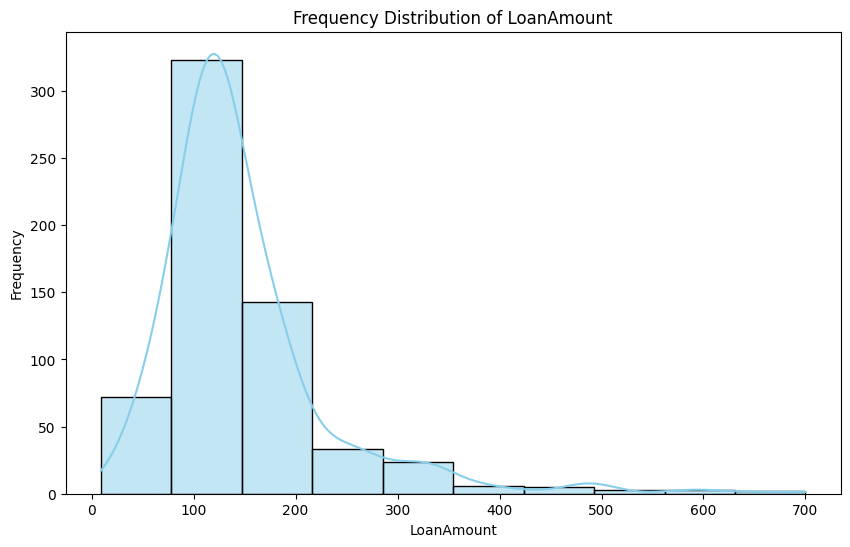

In [ ]:
plt.figure(figsize=(10, 6))

# Create histogram using Seaborn
sns.histplot(data=df, x='LoanAmount', bins=10, kde=True, color='skyblue')

# Set title and labels
plt.title('Frequency Distribution of LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')

plt.show()

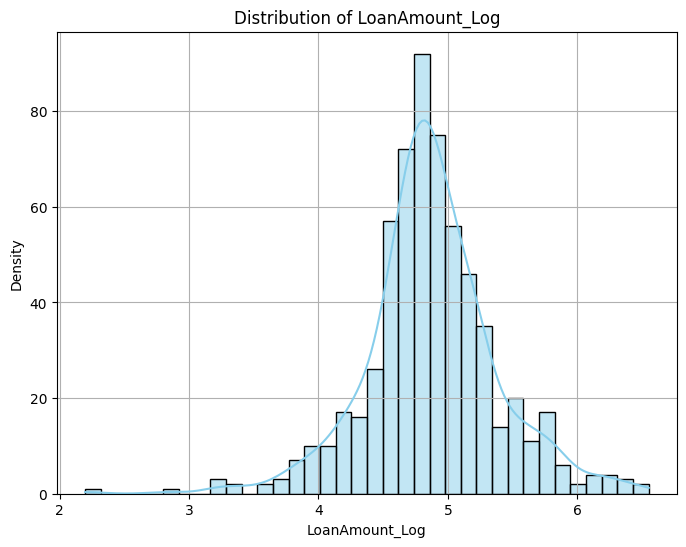

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['LoanAmount_Log'], kde=True, color='skyblue')
plt.title('Distribution of LoanAmount_Log')
plt.xlabel('LoanAmount_Log')
plt.ylabel('Density')
plt.grid(True)
plt.show()

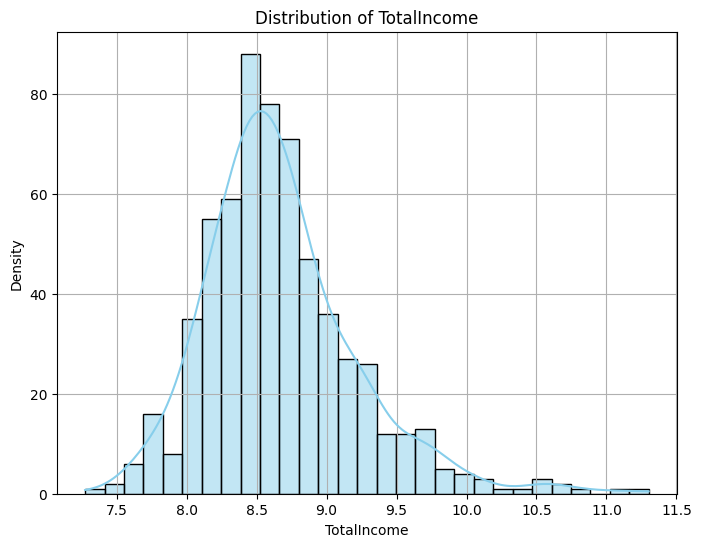

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalIncome'], kde=True, color='skyblue')
plt.title('Distribution of TotalIncome')
plt.xlabel('TotalIncome')
plt.ylabel('Density')
plt.grid(True)
plt.show()

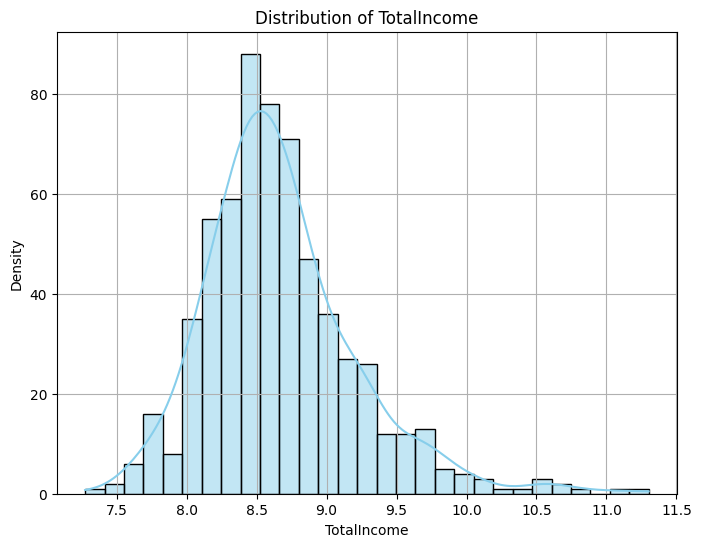

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalIncome'], kde=True, color='skyblue')
plt.title('Distribution of TotalIncome')
plt.xlabel('TotalIncome')
plt.ylabel('Density')
plt.grid(True)
plt.show()

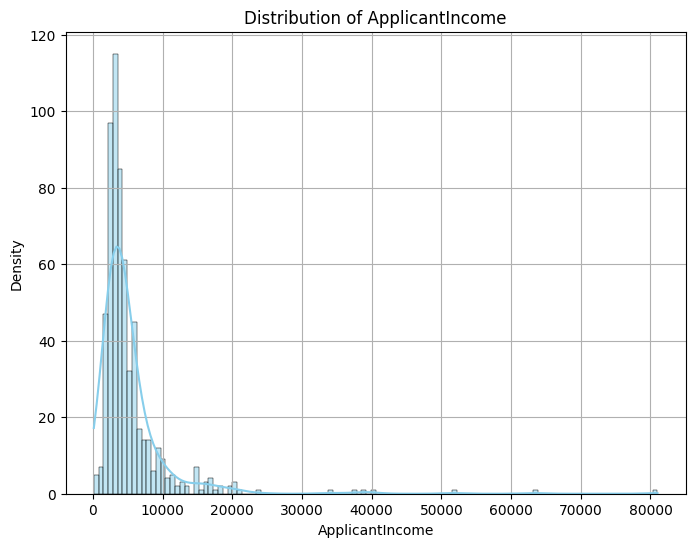

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['ApplicantIncome'], kde=True, color='skyblue')
plt.title('Distribution of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

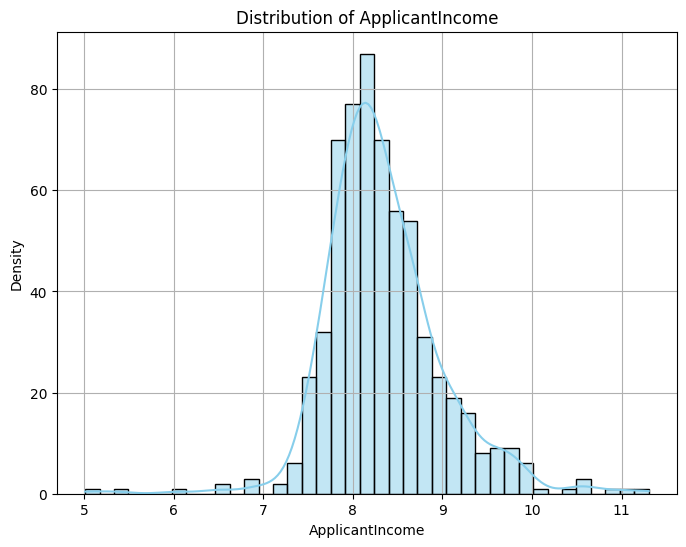

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['ApplicantIncome'], kde=True, color='skyblue')
plt.title('Distribution of ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('Density')
plt.grid(True)
plt.show()

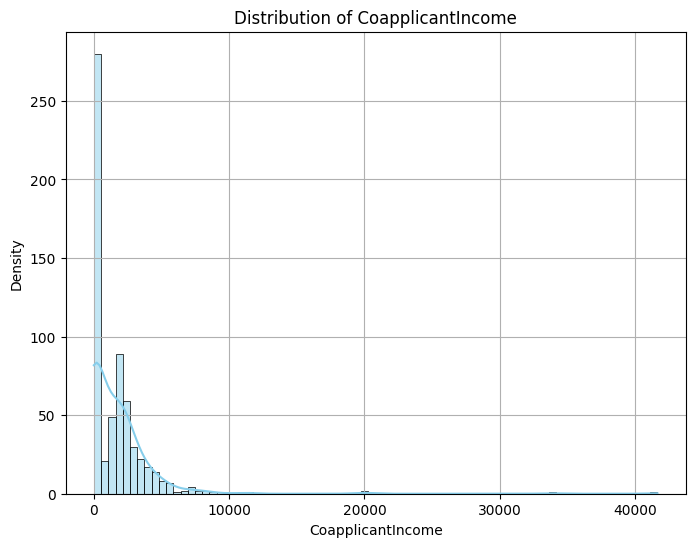

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CoapplicantIncome'], kde=True, color='skyblue')
plt.title('Distribution of CoapplicantIncome')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Density')
plt.grid(True)
plt.show()

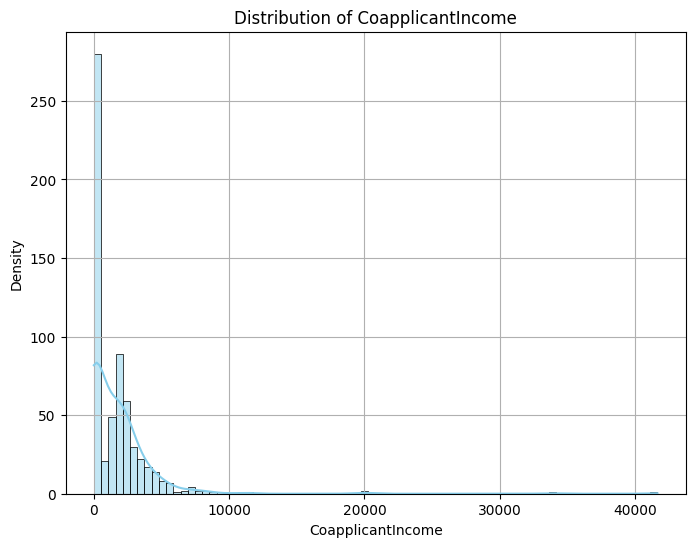

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CoapplicantIncome'], kde=True, color='skyblue')
plt.title('Distribution of CoapplicantIncome')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### Correlation Heatmap using Plotly

Here, we will use `plotly` to create an interactive correlation heatmap. That will allow us to explore the correlation between different features in the dataset visually.

In [ ]:
# Heatmap using Plotly
heatmap = go.Heatmap(z=df.corr(), x=df.columns, y=df.columns, colorscale='RdBu')

# Define layout
layout = go.Layout(
    title='Correlation Matrix',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    width=800,  # Adjust width as needed
    height=600,  # Adjust height as needed
)

# Create figure
fig = go.Figure(data=[heatmap], layout=layout)

# Show plot
fig.show()

# Data Splitting for Machine Learning

Here, we will first split the data into Features, `X` and Target variable, `y`. Then, we will split the data into train and test for machine learning model for training the model and evaluating the model.

In [ ]:
# Features (X)
X = df.drop(columns=['Loan_Status'])

# Target variable (y)
y = df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Machine Learning Model and Evaluation

Here, we will initialize and evaluate different classifier models to evaluate our models and create a predictive loan approval model.

### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize XGBoost classifier
xgb = XGBClassifier()

In [ ]:
# Train the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6991869918699187


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.7073170731707317


### Light Gradient Boosting Classifier

In [ ]:
import lightgbm as lgb

# Converting data into LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Setting parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_error',  # Use 'binary_error' for classification
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'early_stopping_rounds': 10,  # Early stopping parameter
}

# Training the model
lgb_model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])


[LightGBM] [Info] Number of positive: 344, number of negative: 147
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.700611 -> initscore=0.850209
[LightGBM] [Info] Start training from score 0.850209
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

In [ ]:
# Making predictions
y_pred_prob = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_prob]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("LightGBM Accuracy:", accuracy)

LightGBM Accuracy: 0.7642276422764228


### Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.6504065040650406


### CatBoost Classifier

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier()

# Train the model
catboost_model.fit(X_train, y_train)

Learning rate set to 0.007604
0:	learn: 0.6903872	total: 48.8ms	remaining: 48.8s
1:	learn: 0.6874540	total: 51.3ms	remaining: 25.6s
2:	learn: 0.6840510	total: 53.8ms	remaining: 17.9s
3:	learn: 0.6809710	total: 56.2ms	remaining: 14s
4:	learn: 0.6777317	total: 58.6ms	remaining: 11.7s
5:	learn: 0.6749349	total: 60.8ms	remaining: 10.1s
6:	learn: 0.6714996	total: 63.1ms	remaining: 8.96s
7:	learn: 0.6689675	total: 64.6ms	remaining: 8.02s
8:	learn: 0.6663034	total: 67ms	remaining: 7.37s
9:	learn: 0.6638179	total: 69.1ms	remaining: 6.84s
10:	learn: 0.6608226	total: 71.6ms	remaining: 6.44s
11:	learn: 0.6582106	total: 76.8ms	remaining: 6.32s
12:	learn: 0.6549864	total: 79.3ms	remaining: 6.02s
13:	learn: 0.6528260	total: 80.6ms	remaining: 5.68s
14:	learn: 0.6500427	total: 82.8ms	remaining: 5.44s
15:	learn: 0.6477121	total: 84.3ms	remaining: 5.18s
16:	learn: 0.6446757	total: 87ms	remaining: 5.03s
17:	learn: 0.6421604	total: 89.5ms	remaining: 4.88s
18:	learn: 0.6391816	total: 91.9ms	remaining: 4.75

In [ ]:
# Make predictions
y_pred = catboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Accuracy:", accuracy)

CatBoost Accuracy: 0.7398373983739838


### TabularNeuralNet

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Define the architecture of the Tabular Neural Network
class TabularNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TabularNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [44]:
# Initialize the Tabular Neural Network model
input_size = X_train.shape[1]  # Input size should match the number of features
hidden_size = 64
output_size = 2  # Assuming binary classification (e.g., 0 for loan rejection, 1 for approval)
tabular_nn_model = TabularNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(tabular_nn_model.parameters(), lr=0.001)

NameError: name 'X_train' is not defined

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.Tensor(X_train.values)
y_train_tensor = torch.LongTensor(y_train.values)
X_test_tensor = torch.Tensor(X_test.values)
y_test_tensor = torch.LongTensor(y_test.values)

# Create DataLoader for training and testing data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# Training loop
num_epochs = 350
for epoch in range(num_epochs):
    tabular_nn_model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = tabular_nn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Print epoch number
    print(f"Epoch [{epoch + 1}/{num_epochs}]")

Epoch [1/350]
Epoch [2/350]
Epoch [3/350]
Epoch [4/350]
Epoch [5/350]
Epoch [6/350]
Epoch [7/350]
Epoch [8/350]
Epoch [9/350]
Epoch [10/350]
Epoch [11/350]
Epoch [12/350]
Epoch [13/350]
Epoch [14/350]
Epoch [15/350]
Epoch [16/350]
Epoch [17/350]
Epoch [18/350]
Epoch [19/350]
Epoch [20/350]
Epoch [21/350]
Epoch [22/350]
Epoch [23/350]
Epoch [24/350]
Epoch [25/350]
Epoch [26/350]
Epoch [27/350]
Epoch [28/350]
Epoch [29/350]
Epoch [30/350]
Epoch [31/350]
Epoch [32/350]
Epoch [33/350]
Epoch [34/350]
Epoch [35/350]
Epoch [36/350]
Epoch [37/350]
Epoch [38/350]
Epoch [39/350]
Epoch [40/350]
Epoch [41/350]
Epoch [42/350]
Epoch [43/350]
Epoch [44/350]
Epoch [45/350]
Epoch [46/350]
Epoch [47/350]
Epoch [48/350]
Epoch [49/350]
Epoch [50/350]
Epoch [51/350]
Epoch [52/350]
Epoch [53/350]
Epoch [54/350]
Epoch [55/350]
Epoch [56/350]
Epoch [57/350]
Epoch [58/350]
Epoch [59/350]
Epoch [60/350]
Epoch [61/350]
Epoch [62/350]
Epoch [63/350]
Epoch [64/350]
Epoch [65/350]
Epoch [66/350]
Epoch [67/350]
Epoc

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Make predictions on validation data
tabular_nn_model.eval()
with torch.no_grad():
    predictions = torch.argmax(tabular_nn_model(X_test_tensor), dim=1).numpy()

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


### Ensemble Model

In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize base models
lgbm_model = LGBMClassifier()
xgb_model = XGBClassifier()
catboost_model = CatBoostClassifier()
xt_model = ExtraTreesClassifier()

# Train base models
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)
xt_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 344, number of negative: 147
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.700611 -> initscore=0.850209
[LightGBM] [Info] Start training from score 0.850209
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

ExtraTreesClassifier()

In [ ]:
# Make predictions on validation data
lgbm_pred = lgbm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
catboost_pred = catboost_model.predict(X_test)
xt_pred = xt_model.predict(X_test)

# Create meta-features
meta_features = np.column_stack((lgbm_pred, xgb_pred, catboost_pred, xt_pred))

In [ ]:
# Initialize meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression()

# Train meta-model on meta-features
meta_model.fit(meta_features, y_test)

LogisticRegression()

In [ ]:
# Make predictions on test data
lgbm_test_pred = lgbm_model.predict(X_test)
xgb_test_pred = xgb_model.predict(X_test)
catboost_test_pred = catboost_model.predict(X_test)
xt_test_pred = xt_model.predict(X_test)

# Create meta-features for test data
meta_test_features = np.column_stack((lgbm_test_pred, xgb_test_pred, catboost_test_pred, xt_test_pred))

# Make final predictions using meta-model
final_pred = meta_model.predict(meta_test_features)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, final_pred)
print("Ensemble Model Accuracy:", accuracy)

Ensemble Model Accuracy: 0.7317073170731707
